<font color = 'blue'>
Content: 

1. [Load and Check Data](#1)
1. [Correlation of each columns](#2)
1. [Affecting the diagnosis](#3)
1. [Outlier detection](#4)
1. [Preprocessing dataset](#5)
1. [Logistik regression model](#6)
1. [LightGBM with grid search](#7)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id = "1"></a><br>
# Load and Check Data

In [2]:
train_df = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")
train_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5


* **Unnamed: 32 and id columns mean nothing so these columns are dropped.**
* **Also, except for these columns, there is no missing data.**


In [4]:
train_df.drop(["Unnamed: 32","id"],axis=1,inplace=True)

<a id = "2"></a><br>
# Correlation of each columns

In [5]:
train_df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


* **Since it is difficult to examine the inter-column correlation relationship in this way, I defined a function that displays correlations greater than a certain threshold.**

In [6]:
def corr_selection(data,th):
    list_ = []
    for i in range(len(data.columns)-1):
        for j in range(len(data.columns)-1):
            if data.corr().iloc[i,j]>=th:
                if train_df.corr().index[i] == train_df.corr().columns[j]:
                    pass
                else:
                    list_.append([train_df.corr().index[i],train_df.corr().columns[j]])
    return list_

In [7]:
threshold = 0.95
corr_selection(train_df,threshold)

[['radius_mean', 'perimeter_mean'],
 ['radius_mean', 'area_mean'],
 ['radius_mean', 'radius_worst'],
 ['radius_mean', 'perimeter_worst'],
 ['perimeter_mean', 'radius_mean'],
 ['perimeter_mean', 'area_mean'],
 ['perimeter_mean', 'radius_worst'],
 ['perimeter_mean', 'perimeter_worst'],
 ['area_mean', 'radius_mean'],
 ['area_mean', 'perimeter_mean'],
 ['area_mean', 'radius_worst'],
 ['area_mean', 'perimeter_worst'],
 ['area_mean', 'area_worst'],
 ['radius_se', 'perimeter_se'],
 ['radius_se', 'area_se'],
 ['perimeter_se', 'radius_se'],
 ['area_se', 'radius_se'],
 ['radius_worst', 'radius_mean'],
 ['radius_worst', 'perimeter_mean'],
 ['radius_worst', 'area_mean'],
 ['radius_worst', 'perimeter_worst'],
 ['radius_worst', 'area_worst'],
 ['perimeter_worst', 'radius_mean'],
 ['perimeter_worst', 'perimeter_mean'],
 ['perimeter_worst', 'area_mean'],
 ['perimeter_worst', 'radius_worst'],
 ['perimeter_worst', 'area_worst'],
 ['area_worst', 'area_mean'],
 ['area_worst', 'radius_worst'],
 ['area_wors

In [8]:
train_df.drop(["perimeter_mean","area_mean","radius_worst","perimeter_worst"],axis=1,inplace=True)

In [9]:
corr_selection(train_df,0.95)

[['radius_se', 'perimeter_se'],
 ['radius_se', 'area_se'],
 ['perimeter_se', 'radius_se'],
 ['area_se', 'radius_se']]

In [10]:
train_df.drop(["perimeter_se","area_se"],axis=1,inplace=True)

In [11]:
corr_selection(train_df,0.95)

[]

In [12]:
train_df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<a id = "3"></a><br>
# Affecting the diagnosis

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


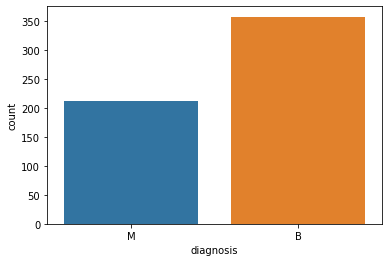

B    357
M    212
Name: diagnosis, dtype: int64

In [13]:
sns.countplot(train_df["diagnosis"])
plt.show()
train_df["diagnosis"].value_counts()

In [14]:
#labelling
train_df["diagnosis"] = [0 if i=="M" else 1 for i in train_df["diagnosis"]]

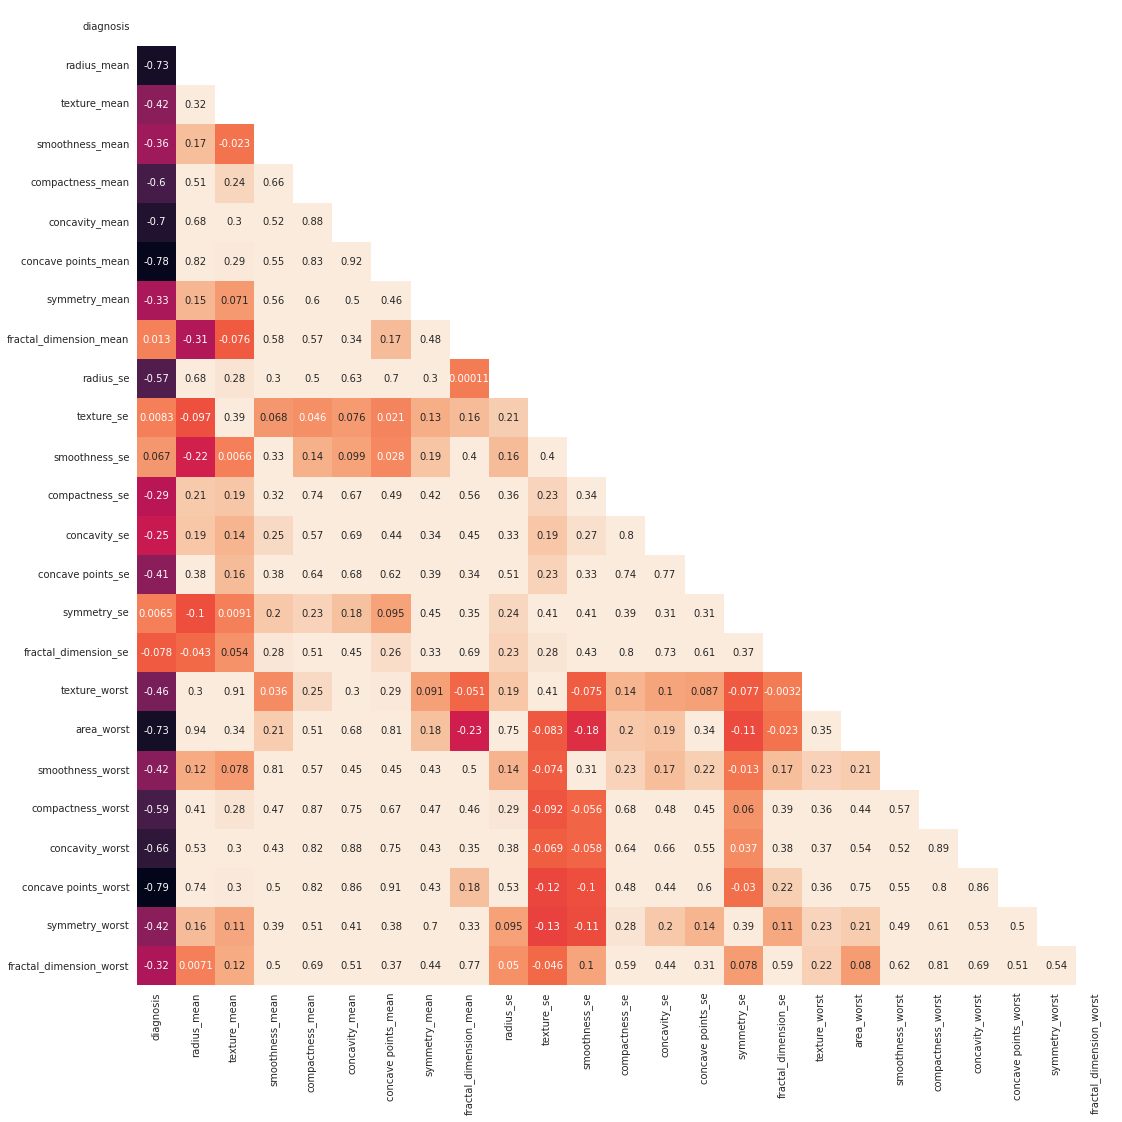

In [15]:
mask = np.zeros_like(train_df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20,18 ))
    ax = sns.heatmap(train_df.corr(), mask=mask, vmax=.3, square=True,annot=True,cbar=False)

* **As can be seen in the graph, those least affecting the diagnosis; fractal_dimension_mean, texture_se, smoothness_se, symmetry_se**

In [16]:
train_df.drop(["fractal_dimension_mean","texture_se","smoothness_se","symmetry_se"],axis=1,inplace=True)
train_df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,compactness_se,...,concave points_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,1.0950,0.04904,...,0.01587,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.5435,0.01308,...,0.01340,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.7456,0.04006,...,0.02058,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.4956,0.07458,...,0.01867,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.7572,0.02461,...,0.01885,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<a id = "4"></a><br>
# Outlier detection

In [17]:
from collections import Counter

def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
        
    
    outlier_indices = Counter(outlier_indices)
    
    multiple_outliers = []
    for v in outlier_indices.items(): 
        if v[-1]>2:
            multiple_outliers.append(v[0])
            
    return multiple_outliers

In [18]:
train_df.loc[detect_outliers(train_df,train_df.columns)]

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,compactness_se,...,concave points_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,0,25.220,24.91,0.10630,0.2665,0.33390,0.18450,0.1829,0.8973,0.05693,...,0.02030,0.005893,33.62,2562.0,0.15730,0.6076,0.6476,0.28670,0.2355,0.10510
108,0,22.270,19.67,0.13260,0.2768,0.42640,0.18230,0.2556,1.2150,0.08668,...,0.02480,0.005037,28.01,2360.0,0.17010,0.6997,0.9608,0.29100,0.4055,0.09789
122,0,24.250,20.20,0.14470,0.2867,0.42680,0.20120,0.2655,1.5090,0.09806,...,0.01822,0.009875,23.99,2073.0,0.16960,0.4244,0.5803,0.22480,0.3222,0.08009
180,0,27.220,21.87,0.10940,0.1914,0.28710,0.18780,0.1800,0.8361,0.02537,...,0.01241,0.002747,32.85,3216.0,0.14720,0.4034,0.5340,0.26880,0.2856,0.08082
202,0,23.290,26.67,0.11410,0.2084,0.35230,0.16200,0.2200,0.5539,0.05121,...,0.02465,0.005195,32.68,1986.0,0.15360,0.4167,0.7892,0.27330,0.3198,0.08762
212,0,28.110,18.47,0.11420,0.1516,0.32010,0.15950,0.1648,2.8730,0.02772,...,0.01407,0.004476,18.47,2499.0,0.11420,0.1516,0.3201,0.15950,0.1648,0.05525
236,0,23.210,26.97,0.09509,0.1682,0.19500,0.12370,0.1909,1.0580,0.02863,...,0.01716,0.003053,34.51,2944.0,0.14810,0.4126,0.5820,0.25930,0.3103,0.08677
339,0,23.510,24.27,0.10690,0.1283,0.23080,0.14100,0.1797,1.0090,0.01971,...,0.01301,0.003118,30.73,2906.0,0.15150,0.2678,0.4819,0.20890,0.2593,0.07738
352,0,25.730,17.46,0.11490,0.2363,0.33680,0.19130,0.1956,0.9948,0.04243,...,0.01508,0.003385,23.58,3234.0,0.15300,0.5937,0.6451,0.27560,0.3690,0.08815
369,0,22.010,21.90,0.10630,0.1954,0.24480,0.15010,0.1824,1.0080,0.02821,...,0.01471,0.003796,25.80,2227.0,0.12940,0.3885,0.4756,0.24320,0.2741,0.08574


In [19]:
train_df.drop(detect_outliers(train_df,train_df.columns),axis=0,inplace=True)
train_df.reset_index(drop=True)
train_df

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,compactness_se,...,concave points_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,0,20.57,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.5435,0.013080,...,0.01340,0.003532,23.41,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.7456,0.040060,...,0.02058,0.004571,25.53,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
4,0,20.29,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.7572,0.024610,...,0.01885,0.005115,16.67,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
5,0,12.45,15.70,0.12780,0.17000,0.15780,0.08089,0.2087,0.3345,0.033450,...,0.01137,0.005082,23.75,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
6,0,18.25,19.98,0.09463,0.10900,0.11270,0.07400,0.1794,0.4467,0.013820,...,0.01039,0.002179,27.66,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,1,11.20,29.37,0.07449,0.03558,0.00000,0.00000,0.1060,0.3141,0.008878,...,0.00000,0.001773,38.30,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905
564,0,21.56,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,1.1760,0.028910,...,0.02454,0.004239,26.40,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.7655,0.024230,...,0.01678,0.002498,38.25,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.4564,0.037310,...,0.01557,0.003892,34.12,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


<a id = "5"></a><br>
# Preprocessing dataset

In [20]:
X = train_df.drop(["diagnosis"],axis=1)
Y = train_df["diagnosis"]

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X = pca.fit_transform(X)

In [23]:
pca.explained_variance_ratio_

array([0.48868946, 0.13595157, 0.09566517, 0.08491062, 0.05280956,
       0.04539146, 0.02840512, 0.01470316, 0.01241529, 0.01045517])

In [24]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

print("X_train",len(x_train))
print("X_test",len(x_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 362
X_test 156
y_train 362
y_test 156


<a id = "6"></a><br>
# Logistic regression model

In [25]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
acc_log_train = round(logreg.score(x_train, y_train)*100,2) 
acc_log_test = round(logreg.score(x_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 98.62
Testing Accuracy: % 98.72


<a id = "7"></a><br>
# LightGBM with grid search

In [26]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

LightGBM=LGBMClassifier()

hiperparams={'max_depth': np.arange(2,10,2),
             'learning_rate': [0.0001,0.001,0.01,0.1,1],
             'n_estimators': np.arange(200,1000,200)}

model_cv=GridSearchCV(LightGBM,hiperparams,cv=5,n_jobs=-1).fit(x_train,y_train)
print(model_cv.best_params_)

# Model tunnnig
model_tunned=LGBMClassifier(learning_rate=model_cv.best_params_['learning_rate'],
                           n_estimators=model_cv.best_params_['n_estimators'],
                           max_depth=model_cv.best_params_['max_depth']).fit(x_train,y_train)
                        

pred_tunned=model_tunned.predict(x_test)

print(f"LGBM accuracy with grid search : {accuracy_score(y_test,pred_tunned)}")

{'learning_rate': 1, 'max_depth': 4, 'n_estimators': 200}
LGBM accuracy with grid search : 0.9551282051282052
